In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv(r"D:\Data Mining\Data sets for lab report\Laptop price\laptop_prices.csv")

In [5]:
data.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [7]:
data.isna().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [13]:
data.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [19]:
df= data.copy()

In [21]:
# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numerical_cols)

# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)', 'Price ($)']
Categorical Columns: ['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating System']


In [23]:
# Initialize the scaler
scaler = MinMaxScaler()

# Normalize numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the normalized data
print(df.head())

    Brand    Processor  RAM (GB)    Storage                 GPU  \
0   Apple  AMD Ryzen 3  1.000000  512GB SSD     Nvidia GTX 1650   
1   Razer  AMD Ryzen 7  0.000000    1TB SSD     Nvidia RTX 3080   
2    Asus     Intel i5  0.466667    2TB SSD     Nvidia RTX 3060   
3  Lenovo     Intel i5  0.000000  256GB SSD     Nvidia RTX 3080   
4   Razer     Intel i3  0.000000  256GB SSD  AMD Radeon RX 6600   

   Screen Size (inch) Resolution  Battery Life (hours)  Weight (kg)  \
0               1.000  2560x1440                0.6125     0.095652   
1               0.175   1366x768                0.6750     0.595652   
2               0.000  3840x2160                0.5625     0.234783   
3               0.000   1366x768                0.8125     0.826087   
4               0.675  3840x2160                0.2125     0.947826   

  Operating System  Price ($)  
0          FreeDOS   0.353096  
1            Linux   0.102221  
2          FreeDOS   0.227339  
3          Windows   0.044794  
4         

In [25]:
df.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,0.347547,0.478076,0.503482,0.496138,0.180846
std,0.362709,0.359249,0.288175,0.290400,0.125080
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066667,0.175000,0.250000,0.243478,0.094267
50%,0.200000,0.575000,0.500000,0.495652,0.148295
75%,0.466667,0.675000,0.750000,0.743478,0.229742
max,1.000000,1.000000,1.000000,1.000000,1.000000


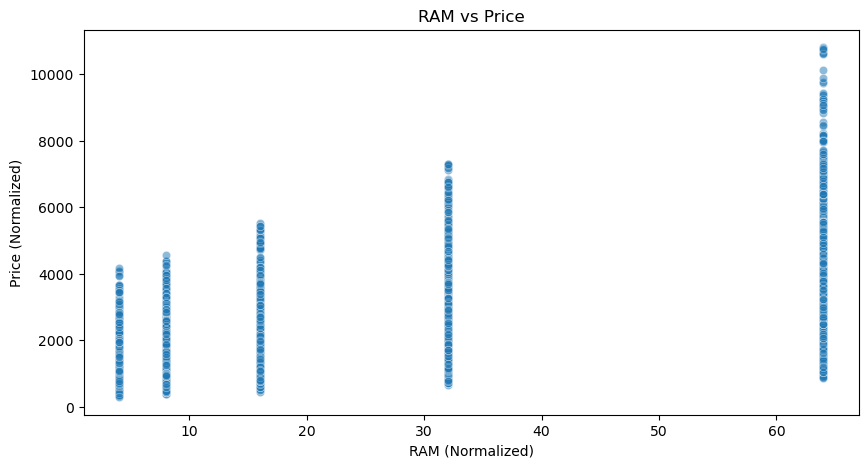

In [39]:
# Scatter plot: RAM vs Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='RAM (GB)', y='Price ($)', alpha=0.5)
plt.title('RAM vs Price')
plt.xlabel('RAM (Normalized)')
plt.ylabel('Price (Normalized)')
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


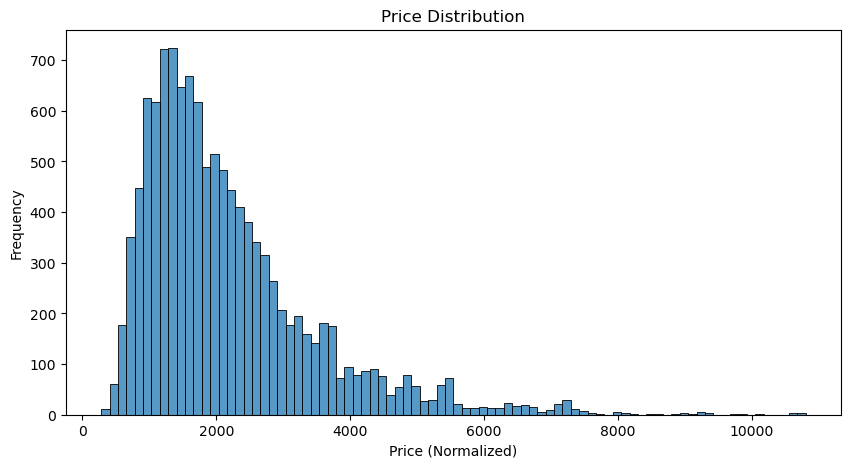

In [43]:
# Histogram: Price distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Price ($)'])
plt.title('Price Distribution')
plt.xlabel('Price (Normalized)')
plt.ylabel('Frequency')
plt.show()

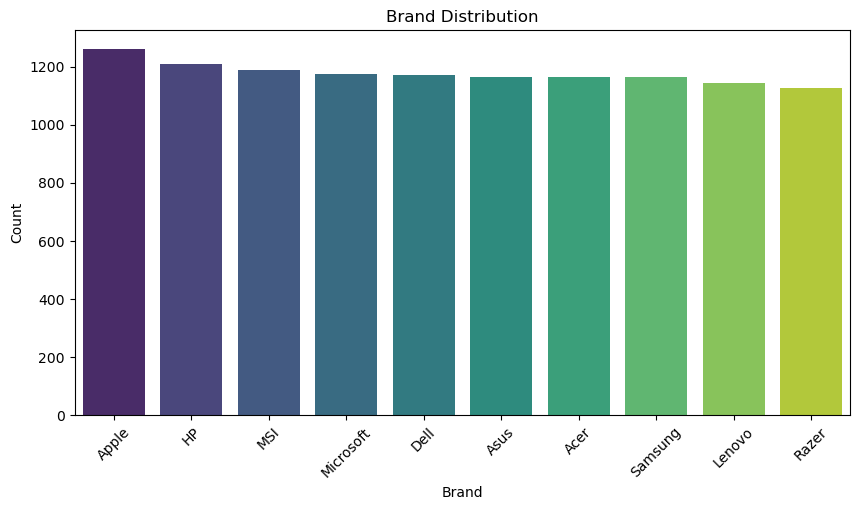

In [37]:
# Bar plot: Brand distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Brand', order=data['Brand'].value_counts().index, palette='viridis')
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Features (X) - All numerical columns except 'Price ($)'
X = df[['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)']]

# Target (y) - 'Price ($)'
y = df['Price ($)']

In [51]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (9414, 4)
Testing data shape: (2354, 4)


In [53]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict on the test data
y_pred = model.predict(X_test)

In [63]:
y_pred

array([0.19977253, 0.20108836, 0.16065589, ..., 0.16046833, 0.14320851,
       0.31475855])

In [57]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.009838969694938726


In [59]:
model.coef_

array([0.21266513, 0.0215761 , 0.00151772, 0.00312186])

In [61]:
model.intercept_

0.0946986421213956

In [65]:
r2_score = r2_score(y_pred, y_test)

In [67]:
r2_score

-0.5855031214351916

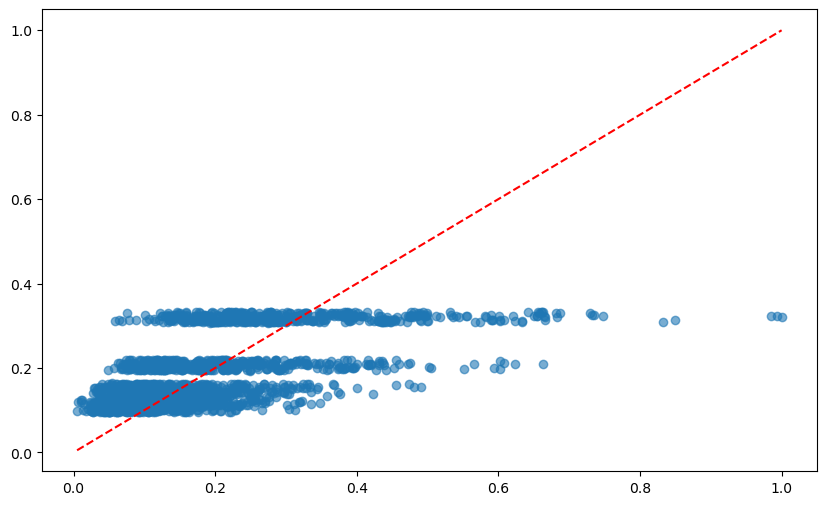

In [87]:
# Scatter Plot: Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.show()